In [1]:
#libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris(as_frame=True)
x = iris.data[["petal length (cm)" , "petal width (cm)"]].values
y = (iris.target == 0) #setosa

In [3]:
per_clf = Perceptron(random_state=42)
per_clf.fit(x , y)

,"penalty penalty: {'l2','l1','elasticnet'}, default=NoneThe penalty (aka regularization term) to be used.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term if regularization isused.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.`l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.Only used if `penalty='elasticnet'`... versionadded:: 0.24",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, the iterations will stopwhen (loss > previous_loss - tol)... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.",0
,"eta0 eta0: float, default=1Constant by which the updates are multiplied.",1.0
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"random_state random_state: int, RandomState instance or None, default=0Used to shuffle the training data, when ``shuffle`` is set to``True``. Pass an int for reproducible output across multiplefunction calls.See :term:`Glossary `.",42


In [4]:
x_new = [[2 , 0.5] , [3,1]]
y_pred = per_clf.predict(x_new)

In [5]:
def plot_perceptron_boundary(x , y , perceptron , axes):
    
    x1_new = np.linspace(axes[0] , axes[1] , 100)
    x2_new = np.linspace(axes[2] , axes[3] , 100) 
    
    x1_grid , x2_grid = np.meshgrid(x1_new , x2_new)
    x_final_points = np.c_[x1_grid.ravel() , x2_grid.ravel()]
    
    custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
    y_pred = perceptron.predict(x_final_points).reshape(x1_grid.shape)
    plt.plot(x[y==0 , 0] , x[y==0 , 1]  , "bs" , label="not setosa")
    plt.plot(x[y==1 , 0] , x[y==1 , 1]  , "yo" , label="setosa")
    plt.contourf(x1_grid , x2_grid , y_pred , cmap=custom_cmap)
    plt.legend(loc="upper left" , fontsize=13)
    plt.axis(axes)
    plt.xlabel("petal length (cm)" , fontsize=14)
    plt.ylabel("petal width (cm)" , fontsize=10 , rotation=34)
    plt.figure(figsize=(10,10))
    
    

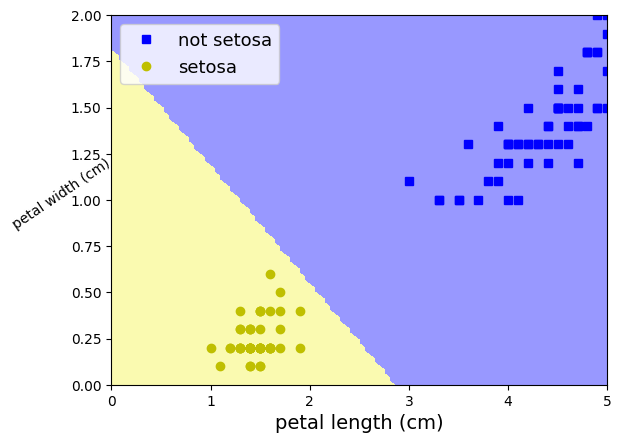

<Figure size 1000x1000 with 0 Axes>

In [6]:
plot_perceptron_boundary(x , y , per_clf , [0, 5, 0, 2])
plt.show()

In [7]:
#calculating the output of perceptron with input (0,1) and weights 1 , 1

#w transpose dot x + bias

#multilayer perceptron
#XOR

In [8]:
def perceptron_out(input_matrix , weight_matrix , bias):
    return 1 if weight_matrix.T.dot(input_matrix) + bias >=0 else 0


In [9]:
perceptron_input = np.array([[0] ,
                             [1]])
weight = np.array([[1],
                   [1]])

left_perceptron_output = perceptron_out(perceptron_input , weight , -3/2)
right_perceptron_output = perceptron_out(perceptron_input , weight , 1/2)
print(f"left_perceptron_out : {left_perceptron_output} \nright perceptron output : {right_perceptron_output}")

left_perceptron_out : 0 
right perceptron output : 1


In [10]:
final_perceptron_output = perceptron_out(np.array([left_perceptron_output , right_perceptron_output]) , np.array([-1 , 1]) , -1/2)
print(f"XOR final pereceptron output is {final_perceptron_output} for the initial input of {perceptron_input}")

XOR final pereceptron output is 1 for the initial input of [[0]
 [1]]


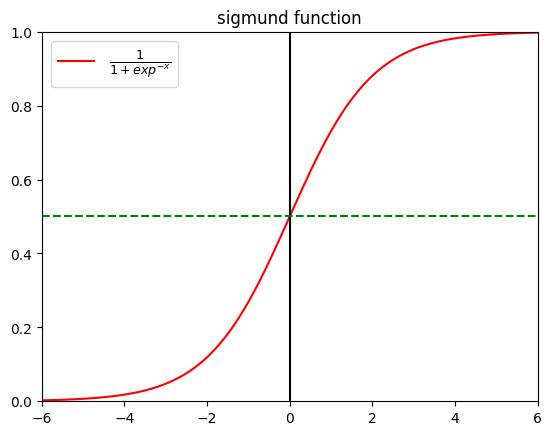

In [11]:
sigmong_input = np.linspace(-6 , 6 , 500)
sigmond_output = 1/( 1 + np.exp(-sigmong_input))

plt.plot(sigmong_input , sigmond_output , "r-" , label=r"$\frac{1}{1+exp^{-x}}$")
plt.legend(loc="upper left" , fontsize=13)
plt.axis([-6 , 6 , 0 , 1])
plt.plot([0 , 0] , [ 0, 1] , "k")
plt.plot([-6,6] , [0.5,0.5] , "g--")
plt.title("sigmund function")

plt.show()


In [12]:
#heaveside : sign function => if x < 0 output 0 else output 1
#ReLu : max(0 , z)
#sigmoid : 1/(1+ exp(-z))
#Tanh : 2 sigmoid(2z) - 1



In [13]:
def derivative(f ,  x , h=0.000001):
    return (f(x + h) - f(x-h))/(2*h)

def relu(z):
    return np.maximum(0 , z)

def sigmoid(z):
    return 1/( 1 + np.exp(-z))

def tanh(z):
    return (2 * sigmoid(2*z)) - 1

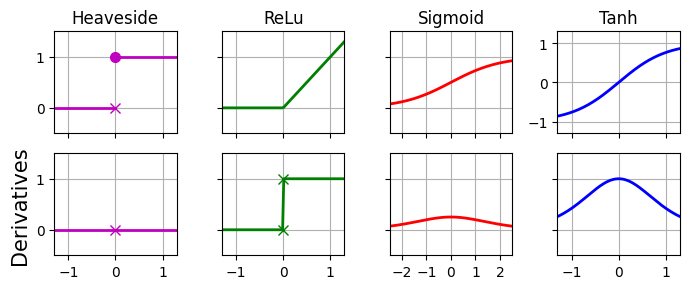

In [14]:
fig , axes = plt.subplots(nrows=2 ,ncols= 4 , figsize=(7,3))


max_z = 2.5
z = np.linspace(-max_z , max_z , 200)
plt.sca(axes[0 , 0])
plt.plot([-max_z , 0] , [0 , 0] , "m-" , linewidth=2)
plt.plot([0 , max_z] , [1 , 1] , "m-" , linewidth=2)
plt.plot(0,0 , "mx" , markersize=7)
plt.plot(0,1, "mo" , markersize=7)
plt.title("Heaveside")
plt.sca(axes[1, 0])
plt.plot(z , derivative(np.sign , z) , "m-" , linewidth=2)
plt.plot(0 , 0 , "mx" , markersize=7)
plt.ylabel("Derivatives" , fontsize=15)

plt.sca(axes[0 , 1])
plt.plot(z , relu(z) , "g-" , linewidth=2)
plt.title("ReLu")
plt.sca(axes[1,1])
plt.plot(z , (relu(z + 0.000001) - relu( z - 0.000001))/(2*0.000001) , "g-" , linewidth=2 )
plt.plot(0 , 0 , "gx" , markersize=7)
plt.plot(0 , 1 , "gx" , markersize=7)

plt.sca(axes[0 , 2])
plt.plot(z , sigmoid(z) , "r-" , linewidth=2)
plt.title("Sigmoid")
plt.sca(axes[1 , 2])
plt.plot(z , (sigmoid(z + 0.000001) - sigmoid( z - 0.000001))/(2*0.000001), "r-" , linewidth=2)

plt.sca(axes[0,3])
plt.plot(z , tanh(z) , "b-",linewidth=2  )
plt.title("Tanh")
plt.sca(axes[1 , 3])
plt.plot(z , (tanh(z + 0.000001) - tanh( z - 0.000001))/(2*0.000001) , "b-" , linewidth=2)


for row in range(2):
    for col in range(4):
        axes[row, col].grid(True)
        if row == 0:
            axes[row, col].set_xticklabels([])
        if col == 2:
            axes[row, col].set_xlim(-max_z, max_z)
            axes[row, col].set_xticks([-2, -1, 0, 1, 2])
        else:
            axes[row, col].set_xlim(-1.3, 1.3)
            axes[row, col].set_xticks([-1, 0, 1])
        if col != 0 and ((row, col) != (0, 3)):
            axes[row, col].set_yticklabels([])
        if (row, col) == (0, 3):
            axes[row, col].set_ylim(-1.3, 1.3)
            axes[row, col].set_yticks([-1, 0, 1])
        else:
            axes[row, col].set_ylim(-0.5, 1.5)
            axes[row, col].set_yticks([0, 1])
plt.tight_layout()
plt.show()

In [15]:
#trainig mlp on the california housing data set

# housing = fetch_california_housing() #showing 403 so i will manually download

In [16]:

#had to use this as fetch california housing is not working
housing = fetch_openml(
    data_id=537,
    as_frame=True
)



In [17]:
housing.frame.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

In [18]:
housing.target = housing.target/100000
#manually the scaling the target 


In [19]:

x_train , x_test , y_train , y_test = train_test_split(housing.data , housing.target , random_state=42)

In [20]:
#mlp regressor with three hidden layer each having 50 perceptrons or neurons

In [21]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50] , early_stopping=True , 
                       verbose=True ,random_state=42)

In [22]:
pipeline = make_pipeline(StandardScaler(),mlp_reg)

pipeline.fit(x_train , y_train)

Iteration 1, loss = 0.80164950
Validation score: 0.552704
Iteration 2, loss = 0.27063108
Validation score: 0.661755
Iteration 3, loss = 0.21955657
Validation score: 0.703445
Iteration 4, loss = 0.19744062
Validation score: 0.725627
Iteration 5, loss = 0.18550915
Validation score: 0.733668
Iteration 6, loss = 0.17721253
Validation score: 0.743077
Iteration 7, loss = 0.17162568
Validation score: 0.752196
Iteration 8, loss = 0.16757659
Validation score: 0.759094
Iteration 9, loss = 0.16461220
Validation score: 0.764205
Iteration 10, loss = 0.15942288
Validation score: 0.761864
Iteration 11, loss = 0.15780919
Validation score: 0.759611
Iteration 12, loss = 0.15689041
Validation score: 0.770245
Iteration 13, loss = 0.15354904
Validation score: 0.772834
Iteration 14, loss = 0.15191190
Validation score: 0.760105
Iteration 15, loss = 0.15015745
Validation score: 0.779102
Iteration 16, loss = 0.14823344
Validation score: 0.777677
Iteration 17, loss = 0.14820157
Validation score: 0.779443
Iterat

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('mlpregressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"loss loss: {'squared_error', 'poisson'}, default='squared_error'The loss function to use when training the weights. Note that the""squared error"" and ""poisson"" losses actually implement""half squares error"" and ""half poisson deviance"" to simplify thecomputation of the gradient. Furthermore, the ""poisson"" loss internally usesa log-link (exponential as the output activation function) and requires``y >= 0``... versionchanged:: 1.7 Added parameter `loss` and option 'poisson'.",'squared_error'
,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","[50, 50, ...]"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural

In [23]:
mlp_reg.best_validation_score_

0.794911503716224

In [24]:
y_pred = pipeline.predict(x_test)
rmse = root_mean_squared_error(y_test , y_pred)
rmse

0.5331865765532238

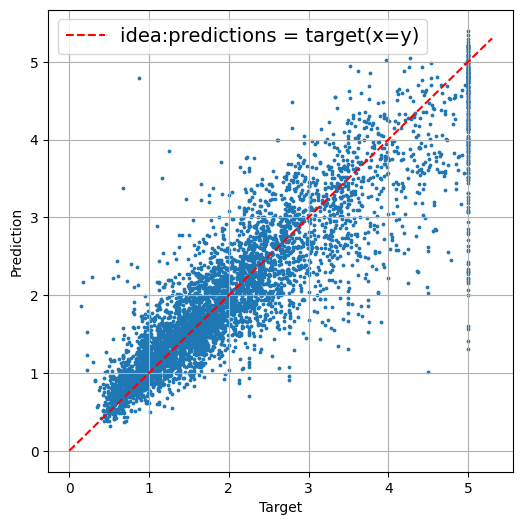

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(y_test , y_pred , s=3 )
plt.plot([0,5.3] , [0,5.3] , "r--" , label="idea:predictions = target(x=y)")
plt.grid()
plt.legend(loc="upper left" , fontsize=14)
plt.xlabel("Target")
plt.ylabel("Prediction")
plt.show()


<h1><b><u>FASHION MNIST</h1><h4> mlp classifier

In [26]:
fashion_mnist = fetch_openml(name="Fashion-MNIST" , as_frame=False)

In [27]:
targets = fashion_mnist.target.astype(int)

In [28]:
x_train , y_train = fashion_mnist.data[:60000] , targets[:60000]
x_test , y_test = fashion_mnist.data[60000:] , targets[60000:]

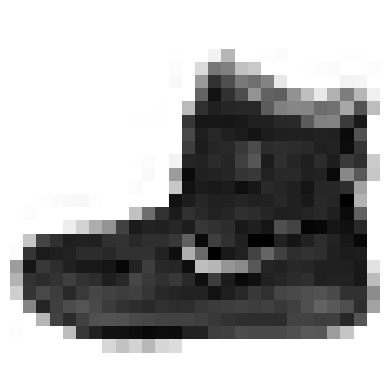

In [29]:
def plot_image(image):
    image_reshape = image.reshape(28 ,28)
    plt.imshow(image_reshape , cmap="binary")
    plt.axis("off")

plot_image(x_train[0])

In [30]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [31]:
class_names[y_test[0]]

'Ankle boot'

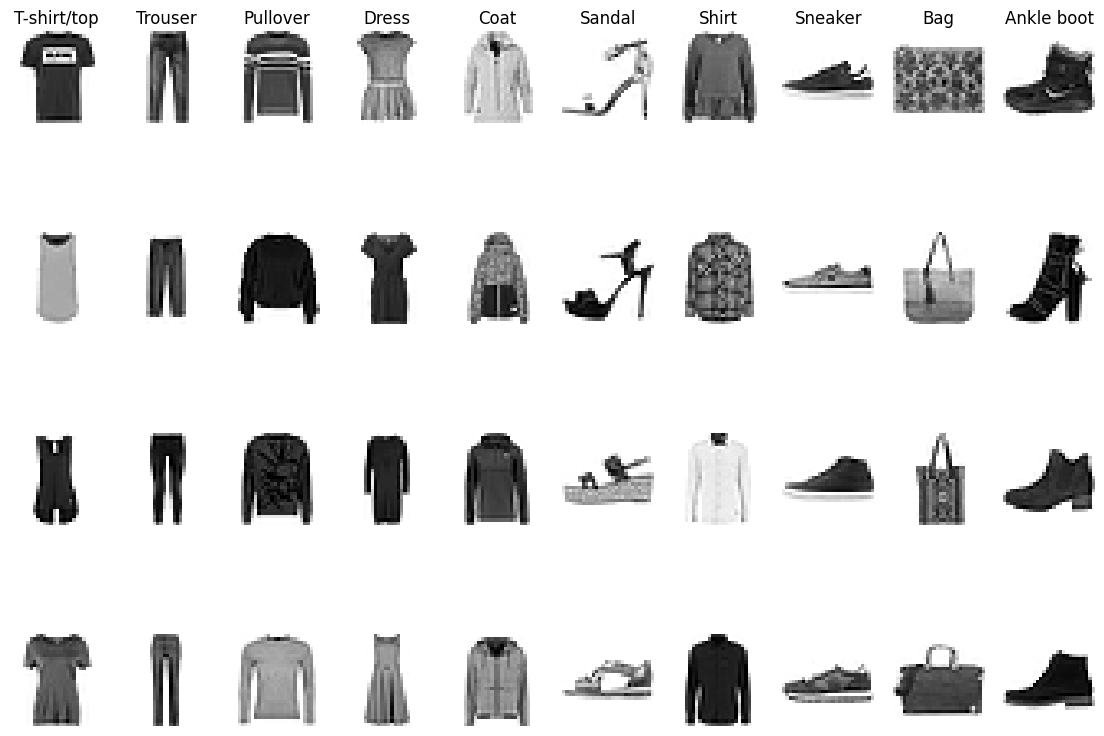

In [32]:
plt.figure(figsize=(14 , 10))
for row in range(4):
    for index in range(len(class_names)):
        image = x_train[y_train == index][row].reshape(28,28)
        y_image = y_train[y_train == index][row]
        plt.subplot(4 , 10 , 10*row + index + 1)
        plt.imshow(image , cmap="binary")
        plt.axis('off')   
        
        if row==0:
            plt.title(class_names[y_image])
            
       
plt.show()
        

In [33]:
mlp_clf = MLPClassifier(hidden_layer_sizes=[300 , 100] , verbose=True,
                        early_stopping=True , random_state=42)
pipeline = make_pipeline(MinMaxScaler() , mlp_clf)
pipeline.fit(x_train , y_train)


Iteration 1, loss = 0.55394420
Validation score: 0.854833
Iteration 2, loss = 0.39017365
Validation score: 0.867500
Iteration 3, loss = 0.34572472
Validation score: 0.877500
Iteration 4, loss = 0.31541926
Validation score: 0.881167
Iteration 5, loss = 0.29351007
Validation score: 0.887167
Iteration 6, loss = 0.28459028
Validation score: 0.889167
Iteration 7, loss = 0.26775210
Validation score: 0.885500
Iteration 8, loss = 0.25610516
Validation score: 0.886667
Iteration 9, loss = 0.24488907
Validation score: 0.893167
Iteration 10, loss = 0.23915583
Validation score: 0.888500
Iteration 11, loss = 0.22290961
Validation score: 0.897167
Iteration 12, loss = 0.21925185
Validation score: 0.889667
Iteration 13, loss = 0.21249406
Validation score: 0.892167
Iteration 14, loss = 0.20374069
Validation score: 0.891333
Iteration 15, loss = 0.19557455
Validation score: 0.893833
Iteration 16, loss = 0.19099949
Validation score: 0.893667
Iteration 17, loss = 0.18445775
Validation score: 0.890333
Iterat

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('minmaxscaler', ...), ('mlpclassifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"feature_range feature_range: tuple (min, max), default=(0, 1)Desired range of transformed data.","(0, ...)"
,"copy copy: bool, default=TrueSet to False to perform inplace row normalization and avoid acopy (if the input is already a numpy array).",True
,"clip clip: bool, default=FalseSet to True to clip transformed values of held-out data toprovided `feature_range`.Since this parameter will clip values, `inverse_transform` may notbe able to restore the original data... note:: Setting `clip=True` does not prevent feature drift (a distribution shift between training and test data). The transformed values are clipped to the `feature_range`, which helps avoid unintended behavior in models sensitive to out-of-range inputs (e.g. linear models). Use with care, as clipping can distort the distribution of test data... versionadded:: 0.24",False
,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","[300, 100]"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'adam'
,"alpha alpha: float, d

In [34]:
accuracy = pipeline.score(x_test , y_test)
accuracy


0.8929